https://colab.research.google.com/drive/1pd4pwT2CUSnQyxi43ysAdwrvEKGpdepB

In [0]:
import numpy as np
from keras.preprocessing import image
from keras.applications import inception_v3
model = inception_v3.InceptionV3()

Using TensorFlow backend.










96116736/96112376 [==============================] - 4s 0us/step


In [0]:
!wget https://www.dropbox.com/s/eqadwd8m21sf0lg/cat.JPG

--2019-09-26 08:51:01--  https://www.dropbox.com/s/eqadwd8m21sf0lg/cat.JPG
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/eqadwd8m21sf0lg/cat.JPG [following]
--2019-09-26 08:51:02--  https://www.dropbox.com/s/raw/eqadwd8m21sf0lg/cat.JPG
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6aaf0eff3b6363c68ed6d1a5d6.dl.dropboxusercontent.com/cd/0/inline/ApTvsGEuqUKCeqD-wTz4e7HE4TWOKtF3kidr-Xv-wyrIVbfpaCWNEWkqZolzN2ud_Y7XTg_tUAMNxAY5aTe9J5Ux8emFQzluL4HHki4wbBVasw/file# [following]
--2019-09-26 08:51:02--  https://uc6aaf0eff3b6363c68ed6d1a5d6.dl.dropboxusercontent.com/cd/0/inline/ApTvsGEuqUKCeqD-wTz4e7HE4TWOKtF3kidr-Xv-wyrIVbfpaCWNEWkqZolzN2ud_Y7XTg_tUAMNxAY5aTe9J5Ux8emFQzluL4HHki4wbBVasw/file
Resolving uc6aaf0eff3b6363c68ed

In [0]:
import cv2

(-0.5, 298.5, 298.5, -0.5)

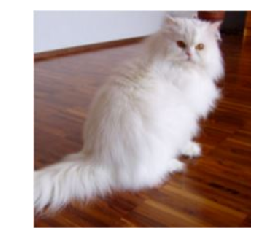

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('/content/cat.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (299,299))
plt.imshow(img)
plt.axis('off')

In [0]:
original_image = cv2.resize(img,(299,299)).astype(float)

In [0]:
original_image /= 255.
original_image -= 0.5
original_image *= 2.

In [0]:
original_image = np.expand_dims(original_image, axis=0)

In [0]:
predictions = model.predict(original_image)
predicted_classes = inception_v3.decode_predictions(predictions, top=1)
imagenet_id, name, confidence = predicted_classes[0][0]
print("This is a {} with {:.4}% confidence!".format(name, confidence * 100))

40960/35363 [==================================] - 0s 0us/step
This is a Persian_cat with 88.27% confidence!


In [0]:
import numpy as np
from keras.preprocessing import image
from keras.applications import inception_v3
from keras import backend as K
from PIL import Image

# Load pre-trained image recognition model
model = inception_v3.InceptionV3()

# Grab a reference to the first and last layer of the neural net
model_input_layer = model.layers[0].input
model_output_layer = model.layers[-1].output

In [0]:
max_change_above = np.copy(original_image) + 0.01
max_change_below = np.copy(original_image) - 0.01

In [0]:
hacked_image = np.copy(original_image)

In [0]:
hacked_image.shape

(1, 299, 299, 3)

In [0]:
np.argmax(predictions)

283

In [0]:
model.predict(hacked_image).argmax()

283

In [0]:
inception_v3.decode_predictions(predictions)

[[('n02123394', 'Persian_cat', 0.8826882),
  ('n02328150', 'Angora', 0.0036682347),
  ('n02127052', 'lynx', 0.0011250689),
  ('n03482405', 'hamper', 0.001074015),
  ('n02085782', 'Japanese_spaniel', 0.0009378552)]]

In [0]:
learning_rate = 0.1
object_type_to_fake = 386
cost_function = model_output_layer[0, object_type_to_fake]

In [0]:
gradient_function = K.gradients(cost_function, model_input_layer)[0]

In [0]:
grab_cost_and_gradients_from_model = K.function([model_input_layer], [cost_function, gradient_function])

cost = 0.0

In [0]:
learning_rate = 0.1

In [0]:
prob_elephant = []

In [0]:
while cost < 0.80:
    cost, gradients = grab_cost_and_gradients_from_model([hacked_image, 0])

    hacked_image += gradients * learning_rate

    hacked_image = np.clip(hacked_image, max_change_below, max_change_above)
    prob_elephant.append(cost)


In [0]:
len(prob_elephant)

13088

In [0]:
epochs = range(1, len(prob_elephant) + 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


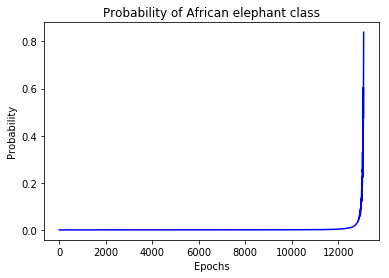

In [0]:
plt.plot(epochs, prob_elephant, 'b')
plt.title('Probability of African elephant class')
plt.xlabel('Epochs')
plt.ylabel('Probability')
plt.grid('off')

In [0]:
model.predict(hacked_image)[0][386]

0.8576559

In [0]:
hacked_image = hacked_image/2

hacked_image = hacked_image + 0.5

hacked_image = hacked_image*255


In [0]:
hacked_image = np.clip(hacked_image, 0, 255).astype('uint8')

(-0.5, 298.5, 298.5, -0.5)

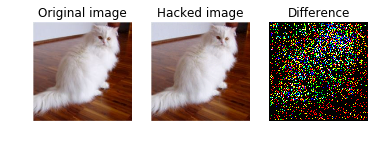

In [0]:
plt.subplot(131)
plt.imshow(img)
plt.title('Original image')
plt.axis('off')
plt.subplot(132)
plt.imshow(hacked_image[0,:,:,:])
plt.title('Hacked image')
plt.axis('off')
plt.subplot(133)
plt.imshow(img - hacked_image[0,:,:,:])
plt.title('Difference')
plt.axis('off')

In [0]:
img

array([[[237, 242, 246],
        [228, 232, 236],
        [222, 226, 232],
        ...,
        [221, 171, 150],
        [223, 169, 149],
        [224, 169, 148]],

       [[231, 236, 240],
        [222, 227, 231],
        [215, 219, 226],
        ...,
        [152, 101,  81],
        [153, 100,  78],
        [154,  98,  77]],

       [[228, 233, 238],
        [217, 223, 228],
        [209, 214, 221],
        ...,
        [106,  54,  32],
        [107,  52,  29],
        [107,  49,  27]],

       ...,

       [[228, 199, 186],
        [146, 115, 102],
        [ 86,  51,  38],
        ...,
        [ 62,  13,   5],
        [ 60,  12,   5],
        [ 59,  11,   5]],

       [[228, 204, 194],
        [156, 130, 121],
        [105,  76,  66],
        ...,
        [ 91,  47,  39],
        [ 90,  46,  38],
        [ 89,  45,  38]],

       [[231, 212, 206],
        [177, 157, 151],
        [141, 118, 111],
        ...,
        [139, 101,  92],
        [138, 100,  92],
        [138,  99,  92]]